<a href="https://colab.research.google.com/github/Itallo0708/Analysis-of-Algorithms/blob/main/tarefa01/trabalho_01_analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 4)

No algoritmo Insertion Sort, a cada iteração $j$ o subarranjo:

$$
A[1 \dots j-1]
$$

encontra-se ordenado, o que permite substituir a pesquisa linear do laço `while` por uma busca binária, reduzindo o número de comparações necessárias para encontrar a posição correta de inserção da chave. Com a busca binária, o custo para localizar a posição de inserção cai de $\Theta(j)$ para $\Theta(\log j)$.

Entretanto, mesmo conhecendo exatamente a posição correta, o algoritmo ainda precisa deslocar os elementos maiores que a chave uma posição à direita para abrir espaço no vetor. No pior caso, esse deslocamento envolve até $j-1$ elementos, o que nos custa:

$$
\text{Custo de Deslocamento} = \Theta(j)
$$

Assim, o custo total de cada iteração é dominado pelas movimentações de elementos, pois $\Theta(j) > \Theta(\log j)$. No pior caso, o tempo de execução total é dado por:

$$
T(n) = \sum_{j=2}^{n} (\underbrace{\Theta(\log j)}_{\text{Busca}} + \underbrace{\Theta(j)}_{\text{Deslocamento}}) \approx\sum_{j=2}^{n} j = \frac{n(n+1)}{2} - 1 = \Theta(n^2)
$$

Portanto, a substituição da busca linear por busca binária reduz apenas o número de comparações, mas não altera a complexidade assintótica do Insertion Sort no pior caso, que permanece $\Theta(n^2)$. Dessa forma, não é possível melhorar o tempo de execução global do pior caso para $\Theta(n \log n)$ apenas com essa modificação.


# Questão 6)

In [4]:
import time
import copy
import time
import copy
import sys
import random
import pandas as pd
import matplotlib.pyplot as plt

# Implementação Heapsoart recursivo


In [11]:
def heapsort_recursivo(vetor_in):
  # cópia da lista original
  lista = copy.copy(vetor_in)
  n = len(lista)

  # contadores
  comparacoes = 0
  trocas = 0
  inicio = time.time()

  def max_heap(n, i):
    nonlocal comparacoes, trocas
    maior = i
    esquerda = 2 * i + 1
    direita = 2 * i + 2

    # verificações dos filhos
    if esquerda < n :
      comparacoes += 1
      if lista[esquerda] > lista[maior]:
        maior = esquerda

    if direita < n:
      comparacoes += 1
      if lista[direita] > lista[maior]:
        maior = direita

    # troca se um dos filhos for maior
    if maior != i:
      lista[i], lista[maior] = lista[maior], lista[i]
      trocas += 1

      max_heap(n, maior)
  for i in range(n // 2 -1, -1, -1):
    max_heap(n, i)

  for i in range(n - 1, 0, -1):
    lista[i], lista[0] = lista[0], lista[i]
    trocas += 1

    max_heap(i, 0)
  fim = time.time()
  return fim - inicio, comparacoes, trocas

# Algoritmo de Benchmark utilizado

In [5]:
def executar_benchmark_grafico(tamanhos):
    resultados = []

    for tamanho in tamanhos:
        dados_base = list(range(tamanho))
        cenarios = {
            'Aleatório': random.sample(dados_base, tamanho),
            'Pior Caso': dados_base[::-1],
            'Melhor Caso': dados_base
        }

        for nome_cenario, dados in cenarios.items():
            tempo, comps, trocas = heapsort_recursivo(dados)
            resultados.append({
                'Cenario': nome_cenario,
                'Tamanho': tamanho,
                'Tempo': tempo,
                'Comparacoes': comps,
                'Trocas': trocas
            })

    return pd.DataFrame(resultados)

# Testes Heapsort Recursivo

Executando testes... Aguarde os gráficos.


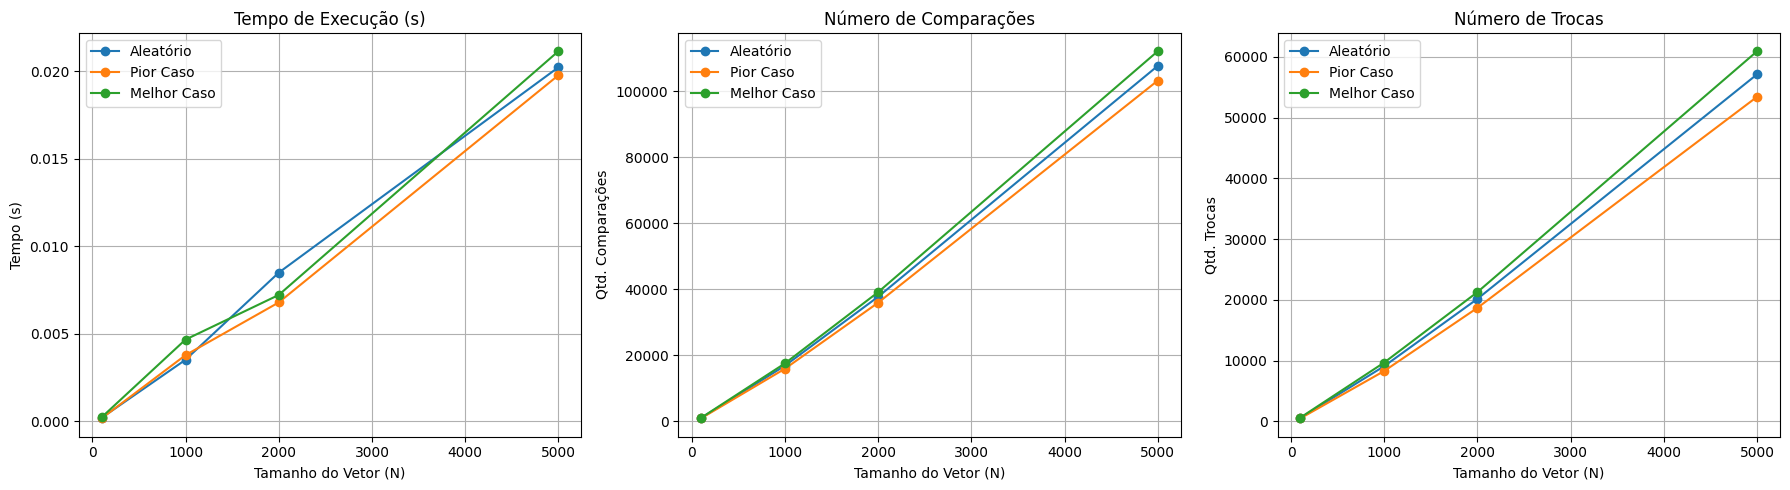

In [10]:
tamanhos_teste = [100, 1000, 2000, 5000]

print("Executando testes... Aguarde os gráficos.")
df = executar_benchmark_grafico(tamanhos_teste)

# Cria os gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metricas = [
    ('Tempo', 'Tempo de Execução (s)', 'Tempo (s)'),
    ('Comparacoes', 'Número de Comparações', 'Qtd. Comparações'),
    ('Trocas', 'Número de Trocas', 'Qtd. Trocas')
]

for i, (coluna, titulo, ylabel) in enumerate(metricas):
    ax = axes[i]
    for cenario in df['Cenario'].unique():
        df_f = df[df['Cenario'] == cenario]
        ax.plot(df_f['Tamanho'], df_f[coluna], marker='o', label=cenario)

    ax.set_title(titulo)
    ax.set_xlabel('Tamanho do Vetor (N)')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()